In [4]:
#test code for single image and single json file corresponding
import json
import openslide
from openslide import OpenSlide
import matplotlib.pyplot as plt
import cv2
import numpy as np
import itertools

#test set. maks on individual json file

#upload original image to use for sizing
#store image path 
image_file = "/Volumes/LN_Images_D/Dina/Data_2/data2_org_red_ndpi/052144-261_copied.ndpi"
image_data = openslide.OpenSlide(image_file)

# Read a specific region from the image (e.g., entire slide)
image_data = image_data.get_thumbnail(size = image_data.level_dimensions[6])

print("converting the image to a numpy array")
#convert the image data to arrays
image_data = np.array(image_data.convert('RGB'))

# Create an empty binary mask with the same dimensions as the original image. black image
#binary_mask = np.zeros_like(image_data)
binary_mask = np.zeros(image_data.shape[:2], dtype= np.uint8)

# json file pathway
json_file = "/Volumes/LN_Images_D/Dina/Data_2/Data_2_Qupath_JSON_file/052144-261.copie.json"

#json file open
with open(json_file, 'r') as json_file:
    json_data = json.load(json_file)


#converting json data to np array store in contours 
print("converting json to np array")

#get the coordinates from the json file

#open list to store the coordinates extracted from the json file
json_annotations = []

#loop through the json file to get the coordinates for each annotations
for i in json_data:
    annotation = i["geometry"]["coordinates"]

    #append the coordinates into the list
    json_annotations.append(annotation) #list will will be a list of a list 
    
    
    #merge the lists in the json_annotationslist to one list
merged_json_annotations=list(itertools.chain.from_iterable(json_annotations))


#downscaling and converting the json coordinates
list_of_array1_downscaled = [np.array([[x, y]], dtype=np.int32) // 64 for x, y in merged_json_annotations]

#combine into a single array
#contours = [np.stack(list_of_array1_downscaled, axis=0)]
# combine into a single array
contours = np.stack(list_of_array1_downscaled, axis=0)


# Draw the contours on the binary mask
# -1 means draw all contours
final = cv2.drawContours(binary_mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

print("show")

# show the mask 
plt.imshow(final)

#Specify the output folder and filename
#output_folder = ""
#output_filename = ""

#cv2.imwrite(os.path.join(output_folder, output_filename), binary_mask)
#print("done")

converting the image to a numpy array
converting json to np array


ValueError: too many values to unpack (expected 2)

converting the image to a numpy array
(1564, 2048, 3)
converting json to np array
7
(1564, 2048)
(array([  0, 255], dtype=uint8), array([2580321,  622751]))
show


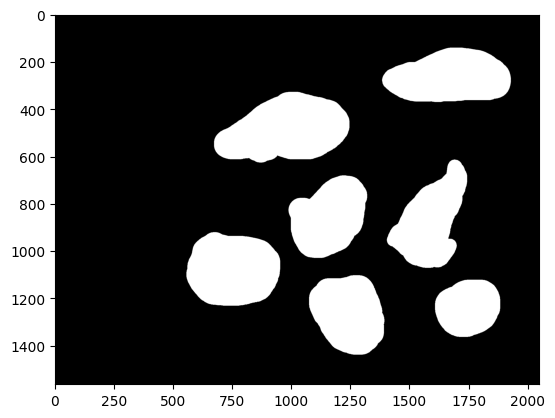

In [42]:
import json
import openslide
from openslide import OpenSlide
import matplotlib.pyplot as plt
import cv2
import numpy as np
import itertools

#test set. maks on individual json file

#upload original image to use for sizing
#store image path 
image_file = "/Volumes/LN_Images_D/Dina/Data_1/data1_qupath_all/data1_not_working_ndpi/6.23.90656 C L2.4_copied.ndpi"
image_data = openslide.OpenSlide(image_file)

# Read a specific region from the image (e.g., entire slide)
image_data = image_data.get_thumbnail(size = image_data.level_dimensions[6])


print("converting the image to a numpy array")
#convert the image data to arrays
image_data = np.array(image_data.convert('RGB'))
print(image_data.shape)

# Create an empty binary mask with the same dimensions as the original image. black image
#binary_mask = np.zeros_like(image_data)
binary_mask = np.zeros(image_data.shape[:2], dtype= np.uint8)

# json file pathway
json_file = "/Volumes/LN_Images_D/Dina/Data_1/data1_qupath_all/data1_not_working_json/6.23.90656_C_L2.4.json"

#json file open
with open(json_file, 'r') as json_file:
    json_data = json.load(json_file)


#converting json data to np array store in contours 
print("converting json to np array")

#get the coordinates from the json file

#open list to store the coordinates extracted from the json file
json_annotations = []

#loop through the json file to get the coordinates for each annotations
for i in json_data:
    annotation = i["geometry"]["coordinates"]

    #append the coordinates into the list
    json_annotations.append(annotation) #list will will be a list of a list 

    #merge the lists in the json_annotationslist to one list
#merged_json_annotations=list(itertools.chain.from_iterable(json_annotations))

contours = []


for i,_ in enumerate(json_annotations):
    contours.append(np.array(json_annotations[i], dtype=np.int32))
"""
    for x, y in i:
        # Downscale the coordinates by dividing by 64
        scaled_x, scaled_y = x , y 
        # Create a numpy array for the downscaled coordinates
        downscaled_coordinates = np.array([[scaled_x, scaled_y]], dtype=np.int32)
        # Append the downscaled coordinates to the list
        list_of_array1_downscaled.append(downscaled_coordinates)
"""

# Combine into a single array
#contours = [np.stack(list_of_array1_downscaled, axis=0)]
#contours = [np.array(json_annotations[0], dtype=np.int32)]

print(len(contours))

print(binary_mask.shape)
# Draw the contours on the binary mask
# -1 means draw all contours
final = cv2.drawContours(binary_mask, contours, -1, (255), thickness=cv2.FILLED)

print(np.unique(binary_mask,return_counts=True))
print("show")

# show the mask 
plt.imshow(final,cmap="gray")





### cleaned code for single NDPI

converting the image to a numpy array
converting json to np array


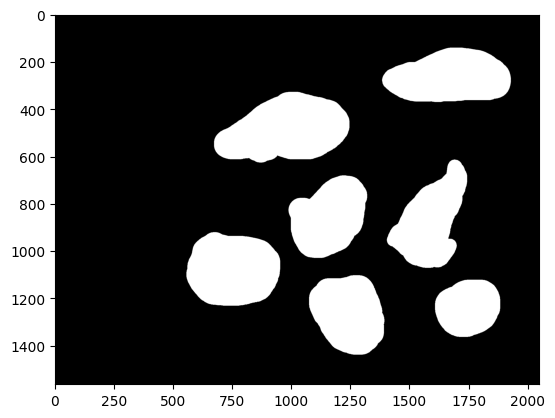

In [4]:
import json
import openslide
from openslide import OpenSlide
import matplotlib.pyplot as plt
import cv2
import numpy as np
import itertools

#original ndpi image 
image_file = "/Volumes/LN_Images_D/Dina/Data_1/data1_qupath_all/data1_not_working_ndpi/6.23.90656 C L2.4_copied.ndpi"
image_data = openslide.OpenSlide(image_file)

# Read a specific region from the image (e.g., entire slide) at level 6 dimension
image_data = image_data.get_thumbnail(size = image_data.level_dimensions[6])


print("converting the image to a numpy array")
#convert the image data to arrays
image_data = np.array(image_data.convert('RGB'))


# Create an empty binary mask with the same dimensions as the original image. black image
#binary_mask = np.zeros_like(image_data)
black_backround = np.zeros(image_data.shape[:2], dtype= np.uint8)

# json file pathway
json_file = "/Volumes/LN_Images_D/Dina/Data_1/data1_qupath_all/data1_not_working_json/6.23.90656_C_L2.4.json"

#json file open
with open(json_file, 'r') as json_file:
    json_data = json.load(json_file)


#converting json data to np array store in contours 
print("converting json to np array")

#get the coordinates from the json file

#open list to store the coordinates extracted from the json file
json_annotations = []

#loop through the json file to get the coordinates for each annotations
for i in json_data:
    annotation = i["geometry"]["coordinates"]

    #append the coordinates into the list
    json_annotations.append(annotation) #list will will be a list of a list 

#open list to store the contours
contours = []

#loop through each LN annotation 
for i,_ in enumerate(json_annotations):
    #convert the coordiantes into a np array 
    contour = np.array(json_annotations[i], dtype=np.int32)
    contours.append(contour)



#draw white contoures on the black backround 
final = cv2.drawContours(black_backround, contours, -1, (255), thickness=cv2.FILLED)


# show the mask 
plt.imshow(final,cmap="gray")


In [5]:
print(black_backround)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# folder ndpi images

In [3]:
# Load necessary modules
import json
import openslide
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import glob

In [1]:
# Define function to generate binary mask from json file and store mask in output folder
def get_binary_mask_json(image_path, json_path, output_folder):
    # Open the image with openslide library
    image_data = openslide.OpenSlide(image_path)
    
    # Read a specific region from the image (e.g., entire slide) at level 6 dimension
    image_data = image_data.get_thumbnail(size=image_data.level_dimensions[6])

    # Checkpoint
    print(f"Processing image: {image_path}")

    # Convert the image data to numpy arrays
    image_data = np.array(image_data.convert('RGB'))

    # Create an empty binary mask (black image) with the same dimensions as the original image 
    black_background = np.zeros(image_data.shape[:2], dtype=np.uint8)

    # Load JSON file
    with open(json_path, 'r') as json_file:
        json_data = json.load(json_file)

    # Checkpoint
    print("Converting JSON to np array")

    # Open a list to store the coordinates extracted from the JSON file
    json_annotations = []

    # Loop through the JSON file to get the coordinates for each annotation
    for i in json_data:
        annotation = i["geometry"]["coordinates"]

        # Append the coordinates into the list
        json_annotations.append(annotation)  # List will be a list of a list

    # Open a list to store the contours
    contours = []

    # Loop through each lymph node annotations
    for i, _ in enumerate(json_annotations):
        # Convert the coordinates into an np array
        contour = np.array(json_annotations[i][0], dtype=np.int32)
        # Append contour to list with contours
        contours.append(contour)
        
        # Downscale the np points by dividing by 64
        downscaled_contour = contour // 64
    
        # Append the downscaled contour to the list
        contours.append(downscaled_contour)
       
    # Draw white contours on the black background
    final = cv2.drawContours(black_background, contours, -1, (255), thickness=cv2.FILLED)
    
    # Generate a new file name for masked
    basename = os.path.basename(image_path)
    # Remove the ".ndpi" extenstion
    mod_name = basename[:-5]
    # Create new file name
    new_file_name = f"{mod_name}_masked.png"

    
    # Copy the file to the destination folder
    cv2.imwrite(os.path.join(output_folder, new_file_name), black_background)

    #checkpoint
    print("Next wsis")

In [4]:
# Input folders with ndpi formatted WSIs
input_image_folder = "input_wsis_ndpi/*"
# Input folder with json file of contours for each image
input_json_folder = "input_json_files/*"
# Output folder
output_folder = "output_folder"

# Get all the WSIs NDPI files 
image_files = sorted(glob.glob(input_image_folder))

# Get all json files
json_files = sorted(glob.glob(input_json_folder))

# Zip image and json file
zipped = zip(image_files,json_files)

# Loop through each pair of image and json files
for image, cor in zipped: 
    # Call function
    get_binary_mask_json(image, cor, output_folder)

# Print message when all binary masks are stored in output folder
print("Done")

Done
